In [213]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

## Data Exploration

In [214]:
df = pd.read_csv("ratings.csv")
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [216]:
# Dropping the timestamp column, which won't be used.
df = df.drop("timestamp", axis=1)
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


### Average Rating per Movie

In [217]:
t = df.groupby("movieId")
t.mean()["rating"]

movieId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: rating, Length: 9724, dtype: float64

Text(0, 0.5, 'Average Rating')

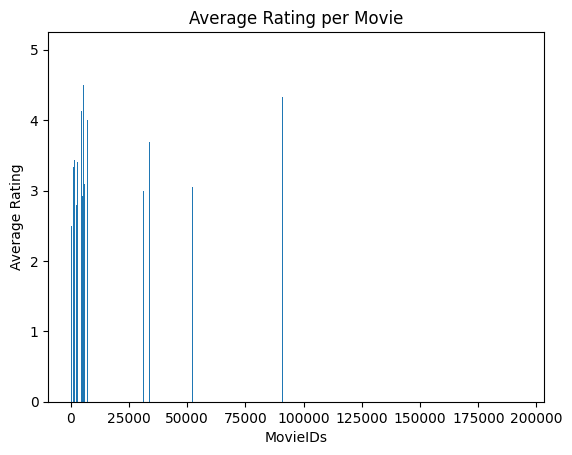

In [218]:
plt.bar(df["movieId"].unique(), t.mean()["rating"])
plt.title("Average Rating per Movie")
plt.xlabel("MovieIDs")
plt.ylabel("Average Rating")

## Baseline Model: Linear Regression with UserID, MovieID, and Genres

In [219]:
mov = pd.read_csv("movies.csv")
mov

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [220]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [221]:
mov['genres'] = mov['genres'].apply(lambda x: x.split('|'))
mov

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


### Genre Prevalence Across the Dataset

Text(0, 0.5, 'Count')

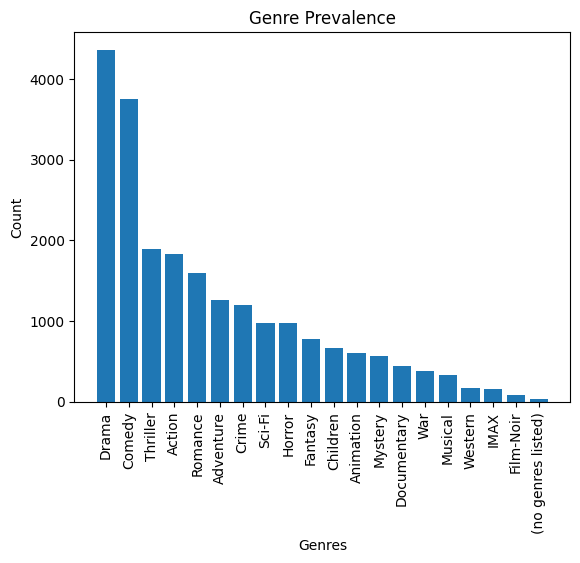

In [222]:
a = mov.explode('genres')['genres']
plt.bar(a.value_counts().index, a.value_counts())
plt.xticks(rotation=90)
plt.title("Genre Prevalence")
plt.xlabel("Genres")
plt.ylabel("Count")

### One-Hot Encoding

In [223]:
# Drop the "Title" column, which won't be used
mov = mov.drop("title", axis=1)

In [224]:
# Record indices for each movie's genres
cols = {'IMAX': np.zeros(len(mov), dtype=int), 'Action': np.zeros(len(mov), dtype=int), 'Adventure': np.zeros(len(mov), dtype=int), 'Animation': np.zeros(len(mov), dtype=int), "Children": np.zeros(len(mov), dtype=int), 'Comedy': np.zeros(len(mov), dtype=int), 'Crime': np.zeros(len(mov), dtype=int), 'Documentary': np.zeros(len(mov), dtype=int), 'Drama': np.zeros(len(mov), dtype=int), 'Fantasy': np.zeros(len(mov), dtype=int), 'Film-Noir': np.zeros(len(mov), dtype=int), 'Horror': np.zeros(len(mov), dtype=int), 'Musical': np.zeros(len(mov), dtype=int), 'Mystery': np.zeros(len(mov), dtype=int), 'Romance': np.zeros(len(mov), dtype=int), 'Sci-Fi': np.zeros(len(mov), dtype=int), 'Thriller': np.zeros(len(mov), dtype=int), 'War': np.zeros(len(mov), dtype=int), 'Western': np.zeros(len(mov), dtype=int), '(no genres listed)': np.zeros(len(mov), dtype=int)}
for i in range(len(mov)):
    for g in mov.loc[i]['genres']:
        cols[g][i] = 1

In [225]:
dummy = pd.DataFrame(cols)
dummy

,IMAX,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [226]:
movs = pd.concat([mov, dummy], axis=1)

In [227]:
movs = movs.drop('genres', axis=1)
movs

,movieId,IMAX,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
data = df.merge(movs, on='movieId')
data

,userId,movieId,rating,IMAX,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,1,1,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,6,4.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,47,5.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,50,5.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
100832,610,168248,5.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
100833,610,168250,5.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100834,610,168252,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              100836 non-null  int64  
 1   movieId             100836 non-null  int64  
 2   rating              100836 non-null  float64
 3   IMAX                100836 non-null  int64  
 4   Action              100836 non-null  int64  
 5   Adventure           100836 non-null  int64  
 6   Animation           100836 non-null  int64  
 7   Children            100836 non-null  int64  
 8   Comedy              100836 non-null  int64  
 9   Crime               100836 non-null  int64  
 10  Documentary         100836 non-null  int64  
 11  Drama               100836 non-null  int64  
 12  Fantasy             100836 non-null  int64  
 13  Film-Noir           100836 non-null  int64  
 14  Horror              100836 non-null  int64  
 15  Musical             100836 non-nul

### Baseline Model:

In [230]:
lr = LinearRegression()
X = data.drop("rating", axis=1)
y = data[["rating"]]
lr.fit(X, y)
print("Baseline accuracy:", lr.score(X, y))

Baseline accuracy: 0.04189091649004262


### Interpretation:
A Linear Regression model was used, as the task is to predict a continuous value (rating). Since user and item factors weren't well-defined, the regression task (evaluated with squared error) performed poorly. Better results would require item factors and perhaps performing the regression task for each user instead of all of them at once.

#### Correlation Matrix

In [231]:
data.corr().unstack()['rating'].sort_values(ascending=False)

rating                1.000000
Drama                 0.125131
Crime                 0.066935
War                   0.066202
Film-Noir             0.037454
Mystery               0.036038
Animation             0.033603
Documentary           0.031432
IMAX                  0.023192
Musical               0.012326
Western               0.011038
Adventure             0.003797
Romance               0.002224
(no genres listed)   -0.000253
Fantasy              -0.003692
movieId              -0.004061
Thriller             -0.004491
Sci-Fi               -0.019968
Children             -0.026941
Action               -0.033946
userId               -0.049348
Horror               -0.065170
Comedy               -0.089101
dtype: float64